In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import string

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
import nltk

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import rcParams

rcParams['figure.figsize'] = 11,11


In [2]:
path = './'
filename = 'heart.csv'

try:
    data_heart = pd.read_csv(path+filename)
    print("File Loaded Succesfully ")
except:
    print("File Not Found !!")

File Loaded Succesfully 


In [3]:
data_heart.shape

(303, 14)

```python
for indvar in data_heart.columns.values:
    if indvar == 'target':
        continue
    sns.FacetGrid(data_heart, hue="target", height =5) \
       .map(sns.distplot, indvar) \
       .add_legend();
    plt.show();
```

In the next cells we're going to implement desicion trees to deduce feature importance

In [4]:
y = data_heart['target'] 
include_col = ['cp','thalach','oldpeak','ca','thal']

X = data_heart[[i for i in data_heart.columns.values.tolist() if i in include_col]]
print (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(303, 5) (303,)
(212, 5) (212,)
(91, 5) (91,)


In [5]:
## Scikit learn and Statsmodel packages
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [6]:
'''Use scikit learn'''
r_d_logistic = LogisticRegression()
r_d_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
## Set up the regression
logit = sm.Logit(y_train, X_train)
logit_result = logit.fit()
## lets get the results
print (logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.400082
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Nov 2018   Pseudo R-squ.:                  0.4105
Time:                        12:53:55   Log-Likelihood:                -84.817
converged:                       True   LL-Null:                       -143.88
                                        LLR p-value:                 1.349e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cp             0.8850      0.200      4.424      0.000       0.493       1.277
thalach        0.0177      0.

In [8]:
predictions = logit_result.predict(X_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print (predictions[:10])

246    0.047268
183    0.361560
229    0.570077
126    0.707691
184    0.100741
1      0.663466
59     0.589749
194    0.626567
132    0.899027
175    0.124472
dtype: float64


In [9]:
print (classification_report(y_test, predictions_nominal, digits=3))

             precision    recall  f1-score   support

          0      0.900     0.720     0.800        50
          1      0.725     0.902     0.804        41

avg / total      0.821     0.802     0.802        91



In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
y = data_heart['target'] 
exclude_col = ['target']

X = data_heart[[i for i in data_heart.columns.values.tolist() if i not in exclude_col]]
print (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(303, 13) (303,)
(212, 13) (212,)
(91, 13) (91,)


In [12]:
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_val = round(random_forest.score(X_test, y_test) * 100, 2)

print("acc train: " + str(acc_train))
print("acc test: "+ str(acc_val))

acc train: 100.0
acc test: 81.32


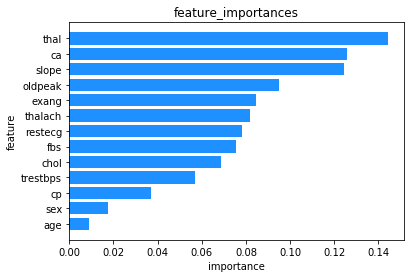

In [13]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index= data_heart.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = data_heart.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

# Neural Networks

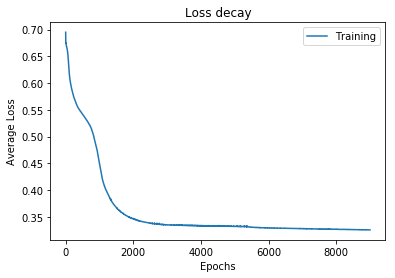

ValueError: could not determine the shape of object type 'DataFrame'

In [16]:
### NUERAL NETWORK

xtrain = X_train
ytrain = y_train

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)

#hyperparameters
# h1 = 6
# h2 = 4 
# lr = 0.0023
# num_epoch =7000

h1 = 6
h2 = 4
lr = 0.0001
num_epoch = 9000

#build model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 2)
    

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #return  F.log_softmax(x, dim=1)
        return x
    
    
net = Net()

#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(net.parameters(), lr=lr, momentum=0.7)

loss_per_epoch = []

#train
for epoch in range(num_epoch):
    X = Variable(torch.Tensor(xtrain.values).float())
    Y = Variable(torch.Tensor(ytrain.values).long())

    #feedforward - backprop
    optimizer.zero_grad()
    
    out = net(X)
    loss = criterion(out, Y)
    loss.backward()
    optimizer.step()

#     if (epoch) % 50 == 0:
#         print ('Epoch [%d/%d] Loss: %.4f' 
#                    %(epoch+1, num_epoch, loss.data[0]))
    loss_per_epoch.append( loss.item()) 
        
epochs = np.arange(1,num_epoch + 1)
plt.plot(epochs, loss_per_epoch, label='Training')
plt.ylabel('Average Loss')
plt.xlabel('Epochs')
plt.title('Loss decay')
plt.legend()
plt.show()       

xtest = X_test
ytest = y_test

#get prediction
X = Variable(torch.Tensor(xtest).float())
Y = torch.Tensor(ytest.values).long()
out = net(X)
_, predicted = torch.max(out.data, 1)


#get prediction train
Xt = Variable(torch.Tensor(xtrain.values).float())
Yt = torch.Tensor(ytrain).long()
out = net(Xt)
_, predicted_train = torch.max(out.data, 1)

#get accuration
print('Accuracy of the network %d %%' % (100 * torch.sum(Y==predicted) / len(y_test)))
print('Accuracy of the train %d %%' % (100 * torch.sum(Yt==predicted_train) / len(y_train)))